In [30]:
import pandas as pd
import numpy as np

volunteer = pd.read_csv("./volunteer_opportunities.csv")
volunteer.head()
volunteer.shape
nadf = volunteer.isna().sum()
print(nadf)

opportunity_id          0
content_id              0
vol_requests            0
event_time              0
title                   0
hits                    0
summary                 0
is_priority           603
category_id            48
category_desc          48
amsl                  665
amsl_unit             665
org_title               0
org_content_id          0
addresses_count         0
locality               70
region                  0
postalcode              6
primary_loc           665
display_url             0
recurrence_type         0
hours                   0
created_date            0
last_modified_date      0
start_date_date         0
end_date_date           0
status                  0
Latitude              665
Longitude             665
Community Board       665
Community Council     665
Census Tract          665
BIN                   665
BBL                   665
NTA                   665
dtype: int64


In [31]:
# Dropping na features
volunteer = volunteer.drop(['BIN', 'BBL', 'NTA'], axis=1)
volunteer.shape

(665, 32)

In [34]:
# Checking the number of null values for a single column
print(volunteer['category_desc'].isna().sum())
volunteer_subset = volunteer[volunteer['category_desc'].notnull()]
print(volunteer_subset.shape)

48
(617, 32)


In [36]:
print("Shape of dataframe before dropping rows", volunteer.shape)
volunteer = volunteer.dropna(axis=0, subset=['category_desc'])
print("Shape of dataframe after dropping rows", volunteer.shape)

Shape of dataframe before dropping rows (665, 32)
Shape of dataframe after dropping rows (617, 32)


In [44]:
# Imputing missing values
sales = pd.read_csv("sales.csv", index_col=['month'])
sales

print(sales.fillna(50))
print(sales[['salt']])

       eggs  salt  spam
month                  
Jan      47  12.0    17
Feb     110  50.0    31
Mar     221  89.0    72
Apr      77  87.0    20
May     132  50.0    52
Jun     205  60.0    55
       salt
month      
Jan    12.0
Feb    50.0
Mar    89.0
Apr    87.0
May     NaN
Jun    60.0


In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(sales)
sales = imputer.transform(sales)
sales

array([[ 47. ,  12. ,  17. ],
       [110. ,  50. ,  31. ],
       [221. ,  89. ,  72. ],
       [ 77. ,  87. ,  20. ],
       [132. ,  59.6,  52. ],
       [205. ,  60. ,  55. ]])

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
print(X_train.shape)
print(y_train.shape)

(426, 30)
(426,)


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Always fit and transform X_train
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

print("Per feature minimum before scaling\n {}".format(X_train.min(axis=0)))
print("Per feature maximum before scaling\n {}".format(X_train.max(axis=0)))

print("Per feature minimum after scaling\n {}".format(x_train_scaled.min(axis=0)))
print("Per feature maximum after scaling\n {}".format(x_train_scaled.max(axis=0)))

x_test_scaled = scaler.transform(X_test)


Per feature minimum before scaling
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
Per feature maximum before scaling
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
Per feature minimum after scaling
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Per feature maximum after scaling
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## Effect of using scaling

### Accuracy without scaling

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

knn.fit(X_train, y_train)

print("Accuracy without scaling {:.2f}".format(knn.score(X_test, y_test)))

Accuracy without scaling 0.94


### Accuracy with scaling

In [58]:
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

knn2 = KNeighborsClassifier()

knn2.fit(scaled_x_train, y_train)

print("Accuracy with scaling {:.2f}".format(knn2.score(scaled_x_test, y_test)))

Accuracy with scaling 0.96


In [62]:
# Using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

knn3 = KNeighborsClassifier()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)
knn3.fit(scaled_x_train, y_train)

print("Accuracy with StandardScaler {:.2f}".format(knn3.score(scaled_x_test, y_test)))

Accuracy with StandardScaler 0.96


In [77]:
# Encoding categorical columns
hiking = pd.read_json('hiking.json')
print(hiking.head())
hiking.info()
hiking.describe()

  Prop_ID                     Name  \
0    B057  Salt Marsh Nature Trail   
1    B073                Lullwater   
2    B073                  Midwood   
3    B073                Peninsula   
4    B073                Waterfall   

                                            Location      Park_Name  \
0  Enter behind the Salt Marsh Nature Center, loc...    Marine Park   
1  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   
2  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   
3  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   
4  Enter Park at Lincoln Road and Ocean Avenue en...  Prospect Park   

       Length Difficulty                                      Other_Details  \
0   0.8 miles       None  <p>The first half of this mile-long trail foll...   
1    1.0 mile       Easy  Explore the Lullwater to see how nature thrive...   
2  0.75 miles       Easy  Step back in time with a walk through Brooklyn...   
3   0.5 miles       Easy  Di

,lat,lon
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [69]:
print(hiking['Accessible'].unique())

['Y' 'N']


In [78]:
# Encoding categorical features

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

hiking['Accessible'] = enc.fit_transform(hiking['Accessible'])
# hiking['Accessible'] = hiking['Accessible'].map({'Y': 1, 'N': 0})
print(hiking['Accessible'].head())

0    1
1    0
2    0
3    0
4    0
Name: Accessible, dtype: int32


In [85]:
# One hot encoding
# volunteer.info()
volunteer['category_desc'].unique()
category_enc = pd.get_dummies(volunteer['category_desc'])
category_enc.head()

,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,1,0,0,0
5,0,0,1,0,0,0


In [88]:
# Feature selection
columns_to_drop = ['category_desc', 'created_date', 'locality', 'region', 'vol_requests']

volunteer_subset = volunteer.drop(columns_to_drop, axis=1)
volunteer_subset.head()

,opportunity_id,content_id,event_time,title,hits,summary,is_priority,category_id,amsl,amsl_unit,...,hours,last_modified_date,start_date_date,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract
1,5008,37036,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,NaN,NaN,...,0,January 25 2011,February 01 2011,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN
2,5016,37143,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,NaN,NaN,...,0,January 21 2011,January 29 2011,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN
3,5022,37237,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,NaN,NaN,...,0,January 25 2011,February 14 2011,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN
4,5055,37425,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,NaN,NaN,...,0,February 01 2011,February 05 2011,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN
5,5056,37426,0,Queens Stop 'N' Swap,135,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,NaN,NaN,...,0,January 28 2011,February 12 2011,February 12 2011,approved,NaN,NaN,NaN,NaN,NaN


In [91]:
# Feature coorelation

from sklearn.datasets import load_wine

wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_df.head()

wine_corr = wine_df.corr()

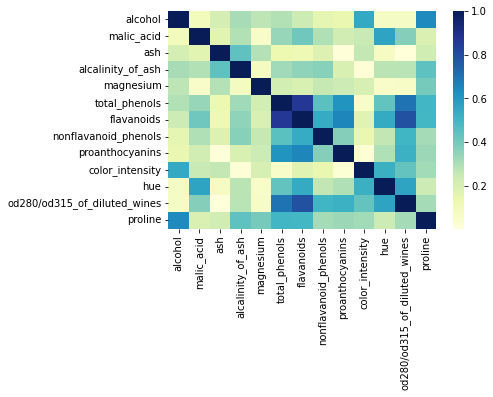

In [94]:
import seaborn as sns
sns.heatmap(wine_corr.abs(), cmap = 'YlGnBu')

columns_to_drop = ['flavanoids']

wine_df = wine_df.drop(columns_to_drop, axis=1)